Это задание выполняется на основе датасета Supermarket sales, который содержит данные о продажах в трех разных супермаркетах. 

В этом задании вам необходимо написать скрипт, который сделает следующее:

1.	Поля Date и Time в основном датафрейме df будут приведены к типу datetime;
2.	Выведет на экран True, если в датасете есть пропуски, и False, если пропусков нет.

В качестве ответа загрузите ваш код программы на Python.

In [12]:
import pandas as pd
df = pd.read_csv('supermarket.csv', sep=',')

# df.info()
df.Date = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M").dt.floor('T')
df.info()
df.head()

# print(df.isnull().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


Задание 1. Напишите скрипт, который будет вычислять общий доход в разбивке по местоположению супермаркета (City) и в динамике. Чтобы отследить динамику изменения дохода (gross income) постройте график, отражающий суммарный доход в разрезе каждого магазина по датам.

Дайте ответы на вопросы, приведенные ниже.

Важно: для ввода ответа используйте строчные символы.



Вопрос 1. Запишите в поля ввода суммы дохода для каждого местоположения магазина. В качестве разделителя дробной и целой части используйте символ точки «.». 

Mandalay      
5057.0320


Naypyitaw     
5265.1765


Yangon          
5057.1605




City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64


<Figure size 1000x600 with 0 Axes>

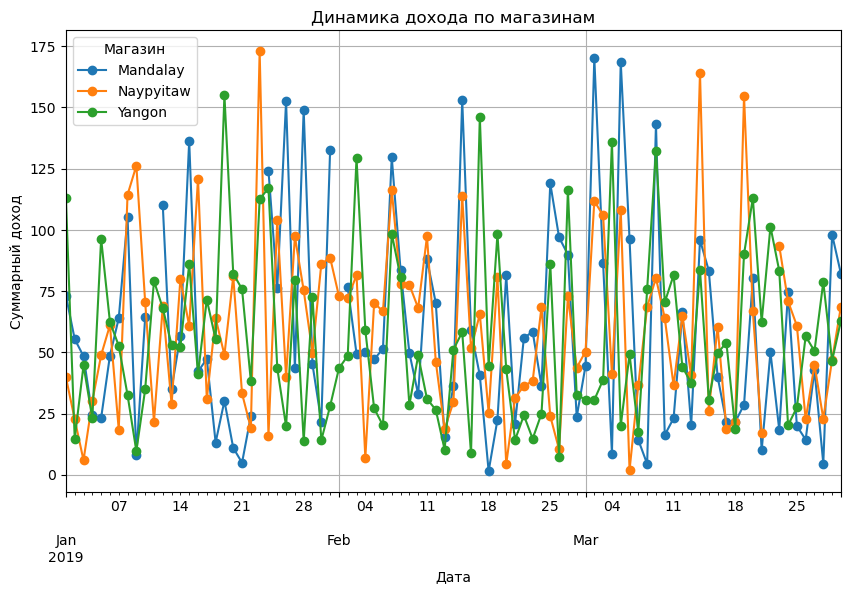

In [15]:
import matplotlib.pyplot as plt
# Суммируем общий доход по каждому городу
income_by_city = df.groupby('City')['gross income'].sum()

# Выводим общий доход по каждому городу
print(income_by_city)

# Суммируем доход по датам для каждого магазина
income_by_date_and_city = df.groupby(['Date', 'City'])['gross income'].sum().unstack()

# Построение графика
plt.figure(figsize=(10, 6))
income_by_date_and_city.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Динамика дохода по магазинам')
plt.xlabel('Дата')
plt.ylabel('Суммарный доход')
plt.legend(title='Магазин', loc='upper left')
plt.grid(True)
plt.show()

Задание 2. Используя ранее выполненные задания, проанализируйте динамику изменения суммы продаж по неделям для каждого расположения магазина.

Вопрос. Какой город имел максимальную недельную прибыль за рассмотренный в датасете период?

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Добавляем столбец недели для группировки
df['Week'] = df['Date'].dt.to_period('W')

# Группируем по городу и неделе и считаем сумму по столбцу "gross income"
weekly_sales = df.groupby(['City', 'Week'])['gross income'].sum().reset_index()

# Находим город с максимальной недельной прибылью
max_sales_city = weekly_sales.loc[weekly_sales['gross income'].idxmax()]

# Выводим результат
print(f"Город с максимальной недельной прибылью: {max_sales_city['City']}")
print(f"Максимальная недельная прибыль: {max_sales_city['gross income']}")


Город с максимальной недельной прибылью: Mandalay
Максимальная недельная прибыль: 630.285


Используя ранее выполненные задания, исследуйте датасет и дайте ответы на вопросы.

Важно: 

●	для ввода ответа используйте строчные символы;
●	если в ответе требуется указать название колонки или значение поля, запишите его точно так же, как название записано в исходных данных.

Вопрос 1. Изучите количество купленных товаров по типу. Запишите в поле тип товара, который больше всего купили. 

In [19]:
# Группируем данные по типу товара и считаем сумму по количеству (Quantity)
product_sales = df.groupby('Product line')['Quantity'].sum().reset_index()

# Находим тип товара с максимальным количеством
max_product_type = product_sales.loc[product_sales['Quantity'].idxmax()]

# Выводим результат
print(f"Тип товара, который больше всего купили: {max_product_type['Product line']}")


Тип товара, который больше всего купили: Electronic accessories


Вопрос 2. Проанализируйте нормализованную долю покупателей-членов бонусной программы и нет. Результат округлите до трех знаков после запятой. Запишите в поля ввода долю каждой группы. В качестве разделителя дробной и целой части используйте символ точки «.».



Member    

Normal     

In [20]:
# Подсчитываем количество покупателей по каждой группе (Member, Normal)
group_counts = df['Customer type'].value_counts()

# Рассчитываем нормализованную долю
total_customers = group_counts.sum()
member_share = group_counts['Member'] / total_customers
normal_share = group_counts['Normal'] / total_customers

# Округляем результаты до 3 знаков после запятой
member_share_rounded = round(member_share, 3)
normal_share_rounded = round(normal_share, 3)

# Выводим результат
print(f"Доля 'Member': {member_share_rounded}")
print(f"Доля 'Normal': {normal_share_rounded}")


Доля 'Member': 0.501
Доля 'Normal': 0.499


Вопрос 3. Определите и запишите в поля для ввода средний чек по каждому платежному методу. Результат округлите до двух знаков после запятой. В качестве разделителя дробной и целой части используйте символ точки «.».



Cash              

Credit card    

Ewallet          

In [24]:
avg_check = df.groupby('Payment').Total.mean().round(2)
avg_check

Payment
Cash           326.18
Credit card    324.01
Ewallet        318.82
Name: Total, dtype: float64

Вопрос 4. Проанализируйте динамику среднего чека по каждому платежному методу понедельно. Запишите в поле ввода название платежного метода, имеющего наименьший средний чек на 3-й неделе.

In [27]:
df.Week

week_avg_check = df.groupby(["Week", "Payment"]).Total.mean()

In [28]:
week_avg_check

Week                   Payment    
2018-12-31/2019-01-06  Cash           269.873000
                       Credit card    391.237350
                       Ewallet        289.379250
2019-01-07/2019-01-13  Cash           386.833239
                       Credit card    313.019000
                       Ewallet        309.240065
2019-01-14/2019-01-20  Cash           439.591250
                       Credit card    345.609000
                       Ewallet        282.203950
2019-01-21/2019-01-27  Cash           318.032663
                       Credit card    332.398500
                       Ewallet        300.533545
2019-01-28/2019-02-03  Cash           304.630065
                       Credit card    335.617500
                       Ewallet        396.651063
2019-02-04/2019-02-10  Cash           290.681016
                       Credit card    336.860045
                       Ewallet        273.397895
2019-02-11/2019-02-17  Cash           341.899385
                       Credit card

В этом задании вы будете работать с датасетом, содержащим информацию об электромобилях — Electric cars.csv. 

Если вы занимаетесь разработкой модели анализа перспективности сегментов рынка или оценкой уровня страховки автомобилей, то вам может пригодиться проведение парного анализа признаков и выводы о возможности создания новых удобных признаков на основе анализа. В этом случае полезным будет предварительный анализ возможных комбинированных производных признаков, таких как площади, линии и другие геометрические фигуры.

Что необходимо сделать:

1.	Загрузить датасет и проанализировать его структуру.

2.	Построить график зависимости значений столбца PriceEuro от TopSpeed_KmH с помощью функции scatter библиотеки matplotlib.

3.	Подсчитать визуально количество вершин описывающего многоугольника.

4.	Определить, какую площадь имеет описывающий прямоугольник.

Описывающий многоугольник — выпуклый многоугольник, вершинами которого являются точки диаграммы, при этом все остальные вершины находятся внутри многоугольника. На рисунке ниже вы видите пример построения описывающего многоугольника (показан синим цветом) и описывающего прямоугольника (показан красным цветом).

 

После выполнения задания введите полученные результаты в поле ввода и ответьте на вопросы.


Вопрос 1. Какое количество вершин имеет описывающий многоугольник?




Вопрос 2. Какую площадь имеет описывающий прямоугольник?

In [30]:
df = pd.read_csv('Electric Car.csv')

# Анализ структуры данных
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None
         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Mo

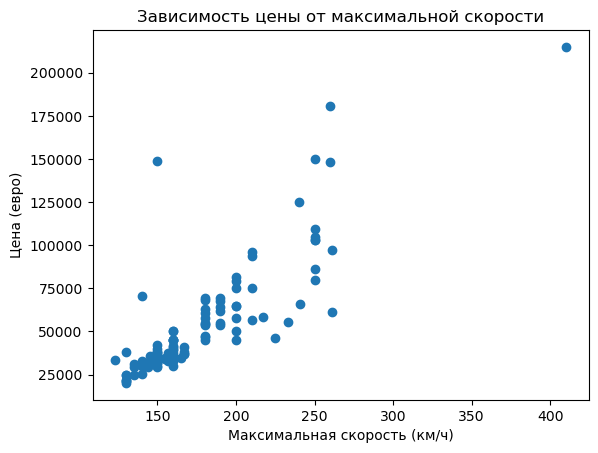

In [32]:
plt.scatter(df['TopSpeed_KmH'], df['PriceEuro'])
plt.title('Зависимость цены от максимальной скорости')
plt.xlabel('Максимальная скорость (км/ч)')
plt.ylabel('Цена (евро)')
plt.show()

In [34]:
from scipy.spatial import ConvexHull

# Получаем координаты для построения многоугольника
points = df[['TopSpeed_KmH', 'PriceEuro']].values

# Строим выпуклую оболочку
hull = ConvexHull(points)

# Количество вершин оболочки
print("Количество вершин описывающего многоугольника:", len(hull.vertices))


Количество вершин описывающего многоугольника: 7


In [35]:
x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()

# Площадь прямоугольника
area = (x_max - x_min) * (y_max - y_min)
print("Площадь описывающего прямоугольника:", area)


Площадь описывающего прямоугольника: 55927977


Напишите программу, выполняющую категоризацию данных датасета Electric cars.csv.

 

1.Используя модуль LabelEncoder из библиотеки sklearn, выполните кодирование категориального признака BodyStyle.

2.Найдите сумму полученных значений категориального признака и сохраните результат в переменную sum.

3.Найдите количество уникальных категорий полученного признака и сохраните результат в переменную cat_count.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Кодирование категориального признака 'BodyStyle'
df['BodyStyle_encoded'] = label_encoder.fit_transform(df['BodyStyle'])
print(df['BodyStyle_encoded'])

# Сумма значений категориального признака
sum_value = df['BodyStyle_encoded'].sum()

# Количество уникальных категорий
cat_count = df['BodyStyle_encoded'].nunique()

# Вывод результатов
print(f"Сумма значений категориального признака: {sum_value}")
print(f"Количество уникальных категорий: {cat_count}")

0      7
1      1
2      2
3      6
4      1
      ..
98     1
99     6
100    1
101    1
102    6
Name: BodyStyle_encoded, Length: 103, dtype: int32
Сумма значений категориального признака: 420
Количество уникальных категорий: 9
